<a href="https://colab.research.google.com/github/AlejAguilar22/Artificial_Intelligence_FIME/blob/main/FFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 6.- Artificial Neural Network: Feedforward
Javier Alejandro Aguilar Espinosa 1877572                             

Diego Alcántara Martinez 2005282                                     
Victor Jahaziel Garza Muñoz
2001180

Diego Tovias Canizales
1994490

Class Day: Tuesday                                                            
Hour: N4-N6

#1. Load libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns

#2. Load data

In [ ]:
# Load data
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

#3. Data preprocessing

In [ ]:
# Data preprocessing
# Normalize the images
train_data = train_data.reshape((train_data.shape[0], 28 * 28)).astype('float32') / 255
test_data = test_data.reshape((test_data.shape[0], 28 * 28)).astype('float32') / 255
# Encode labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#4. Model selection and Training

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.2681 - accuracy: 0.9230 - val_loss: 0.1379 - val_accuracy: 0.9589
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1095 - accuracy: 0.9683 - val_loss: 0.1032 - val_accuracy: 0.9694
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0729 - accuracy: 0.9780 - val_loss: 0.0777 - val_accuracy: 0.9772
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0516 - accuracy: 0.9844 - val_loss: 0.0723 - val_accuracy: 0.9792
Epoch 5/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0398 - accuracy: 0.9882 - val_loss: 0.0666 - val_accuracy: 0.9795


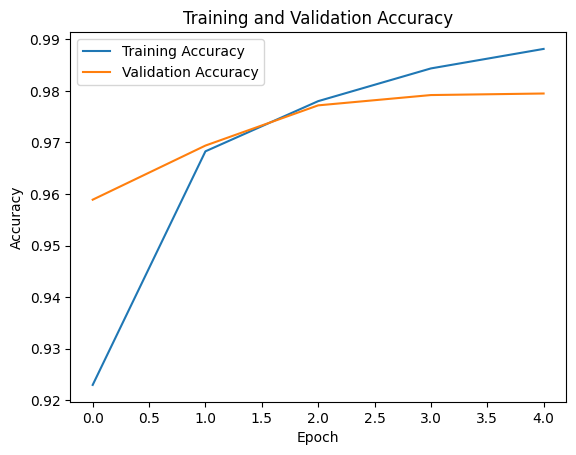

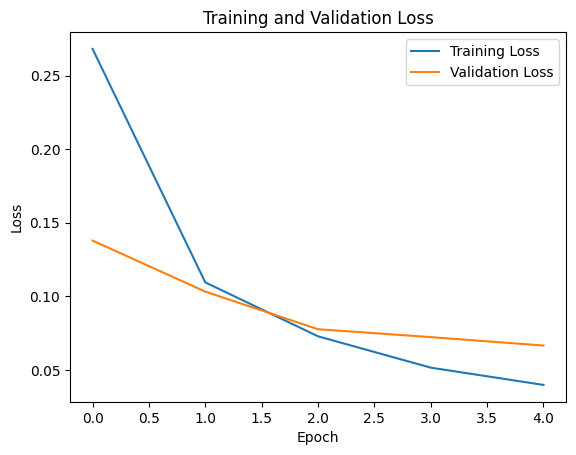

In [ ]:
# Model selection and training
model = Sequential([
    Dense(512, activation='relu', input_shape=(28 * 28,)),
    Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=5, batch_size=128, validation_data=(test_data, test_labels))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

#5. Model testing

313/313 [==============================] - 1s 3ms/step - loss: 0.0666 - accuracy: 0.9795
Test Accuracy: 0.9794999957084656
1/1 [==============================] - 0s 19ms/step
Prediction: 8
Actual Value: 8


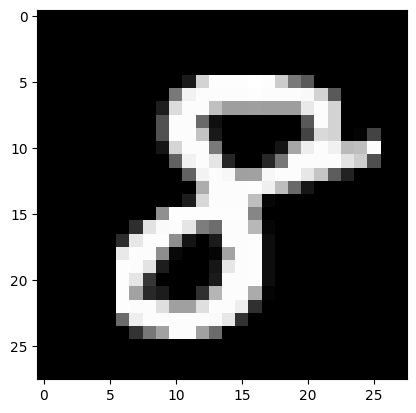

1/1 [==============================] - 0s 20ms/step
Prediction: 6
Actual Value: 6


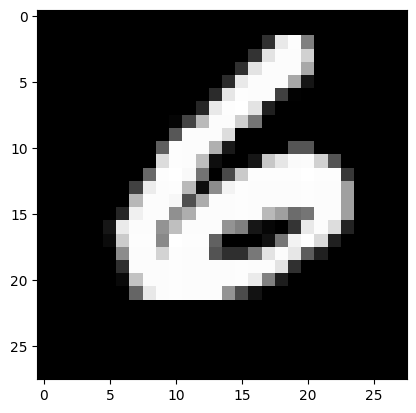

1/1 [==============================] - 0s 21ms/step
Prediction: 1
Actual Value: 1


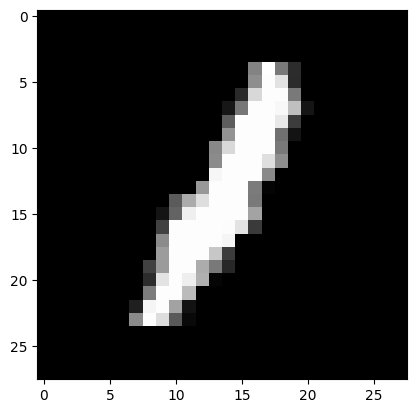

1/1 [==============================] - 0s 19ms/step
Prediction: 1
Actual Value: 1


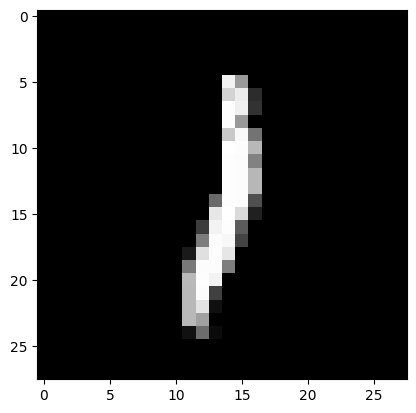

1/1 [==============================] - 0s 20ms/step
Prediction: 4
Actual Value: 4


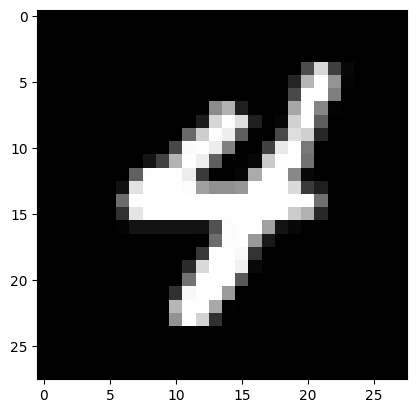

313/313 [==============================] - 1s 2ms/step


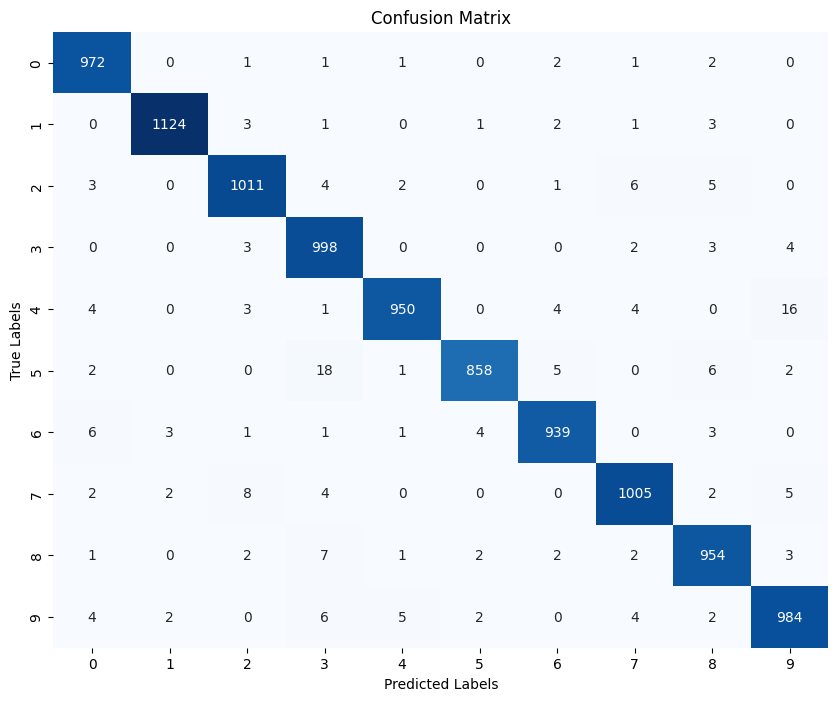

In [ ]:
# Model testing
loss, accuracy = model.evaluate(test_data, test_labels)
print("Test Accuracy:", accuracy)

# Perform 5 different predictions
for _ in range(5):
    # Choose a random index from the test dataset
    idx = np.random.randint(0, len(test_data))
    # Make prediction
    predicted_label = np.argmax(model.predict(test_data[idx:idx+1]))
    # Display prediction and actual value
    print("Prediction:", predicted_label)
    print("Actual Value:", np.argmax(test_labels[idx]))
    # Plot the image
    plt.imshow(test_data[idx].reshape(28, 28), cmap='gray')
    plt.show()

# Confusion Matrix
predicted_labels = np.argmax(model.predict(test_data), axis=1)
true_labels = np.argmax(test_labels, axis=1)
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()